In [1]:
import netCDF4 as netcdf
import geopandas as gpd
import matplotlib.pyplot as plt
from kalpana.export import fort14togdf
from kalpana.ADCIRC_tools import extract_ts_from_nc

This notebook shows how to extract point data from ADCIRC netcdf outputs

### Extract data from a maxele file

In [23]:
## load netcdf
nc = netcdf.Dataset(r'../../adds/inputs_examples/maxele.63.nc')

Plot mesh and points to extract. Three are inside the domain and the other is outside

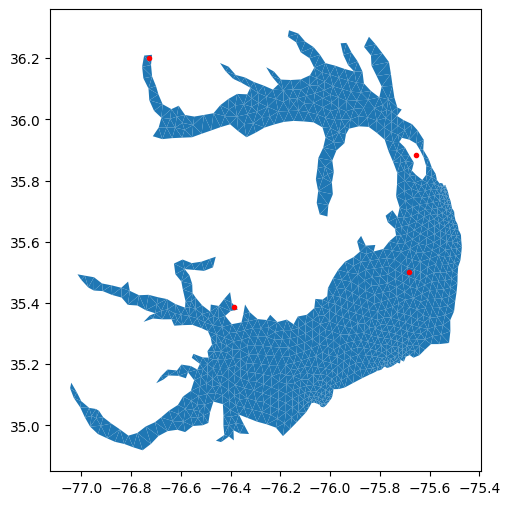

In [21]:
xs = [-75.685, -76.7273, -75.6541, -76.3864]
ys = [35.5, 36.2018, 35.8838, 35.3867]

mesh = fort14togdf(r'../../adds/inputs_examples/fort.14', epsgIn=4326, epsgOut=4326, fileintype='fort.14')
fig, ax = plt.subplots(figsize = (6,6))
mesh.plot(ax = ax)
ax.scatter(xs, ys, color = 'r', marker = '.')

Function called with default parameters. If a point is outside the domain it is excluded, and if one of the nodes of the element where the extraction point lies in is dry, the function returns None.

In [24]:
dfout, rep = extract_ts_from_nc(nc, list(zip(xs, ys)), variable = 'zeta_max', extractOut=False, closestIfDry=False)
print(rep)
dfout

["Point 000 is inside the domain! data was interpolated using the corresponding element's nodes.", "Point 001 is inside the domain! data was interpolated using the corresponding element's nodes.", 'Point 002 is outside the domain! Returning nan.', "Point 003 is inside the domain! data was interpolated using the corresponding element's nodes."]


,zeta_max_pnt000,zeta_max_pnt001,zeta_max_pnt002,zeta_max_pnt003
2011-08-28 12:00:00+00:00,0.710617,2.361077,NaN,1.18116


In [25]:
dfout, rep = extract_ts_from_nc(nc, list(zip(xs, ys)), variable = 'zeta_max', extractOut=True, closestIfDry=False)
print(rep)
dfout

["Point 000 is inside the domain! data was interpolated using the corresponding element's nodes.", "Point 001 is inside the domain! data was interpolated using the corresponding element's nodes.", 'Point 002 is outside the domain! data from  node 0 (closest) was exported.', "Point 003 is inside the domain! data was interpolated using the corresponding element's nodes."]


,zeta_max_pnt000,zeta_max_pnt001,zeta_max_pnt002,zeta_max_pnt003
2011-08-28 12:00:00+00:00,0.710617,2.361077,1.974735,1.18116


This maxele file does not have dry elements, so ```closestIfDry = True``` does not change the output 

### Extract data from a fort.63.nc file

In [26]:
## load netcdf
nc = netcdf.Dataset(r'../../adds/inputs_examples/fort.63.nc')

Function called with default parameters. If a point is outside the domain it is excluded, and if one of the nodes of the element where the extraction point lies in is dry, the function returns None.

In [27]:
dfout, rep = extract_ts_from_nc(nc, list(zip(xs, ys)), variable = 'zeta', extractOut=False, closestIfDry=False)
print(rep)
dfout

["Point 000 is inside the domain! data was interpolated using the corresponding element's nodes.", "Point 001 is inside the domain! data was interpolated using the corresponding element's nodes.", 'Point 002 is outside the domain! Returning nan.', "Point 003 is inside the domain! data was interpolated using the corresponding element's nodes."]


,zeta_pnt000,zeta_pnt001,zeta_pnt002,zeta_pnt003
2011-08-25 12:05:00+00:00,-0.000002,-0.000128,NaN,-0.000218
2011-08-25 12:10:00+00:00,-0.000008,-0.000380,NaN,-0.000713
2011-08-25 12:15:00+00:00,-0.000017,-0.000632,NaN,-0.001392
2011-08-25 12:20:00+00:00,-0.000025,-0.000802,NaN,-0.002163
2011-08-25 12:25:00+00:00,-0.000028,-0.000865,NaN,-0.002942
...,...,...,...,...
2011-08-28 11:40:00+00:00,0.247618,-0.185434,NaN,-0.237104
2011-08-28 11:45:00+00:00,0.243445,-0.181405,NaN,-0.231536
2011-08-28 11:50:00+00:00,0.239488,-0.177134,NaN,-0.225627
2011-08-28 11:55:00+00:00,0.235487,-0.172440,NaN,-0.219394


In [29]:
dfout, rep = extract_ts_from_nc(nc, list(zip(xs, ys)), variable = 'zeta', extractOut=True, closestIfDry=False)
print(rep)
dfout

["Point 000 is inside the domain! data was interpolated using the corresponding element's nodes.", "Point 001 is inside the domain! data was interpolated using the corresponding element's nodes.", 'Point 002 is outside the domain! data from  node 0 (closest) was exported.', "Point 003 is inside the domain! data was interpolated using the corresponding element's nodes."]


,zeta_pnt000,zeta_pnt001,zeta_pnt002,zeta_pnt003
2011-08-25 12:05:00+00:00,-0.000002,-0.000128,0.000251,-0.000218
2011-08-25 12:10:00+00:00,-0.000008,-0.000380,0.000370,-0.000713
2011-08-25 12:15:00+00:00,-0.000017,-0.000632,0.000428,-0.001392
2011-08-25 12:20:00+00:00,-0.000025,-0.000802,0.000459,-0.002163
2011-08-25 12:25:00+00:00,-0.000028,-0.000865,0.000463,-0.002942
...,...,...,...,...
2011-08-28 11:40:00+00:00,0.247618,-0.185434,0.586778,-0.237104
2011-08-28 11:45:00+00:00,0.243445,-0.181405,0.581537,-0.231536
2011-08-28 11:50:00+00:00,0.239488,-0.177134,0.575909,-0.225627
2011-08-28 11:55:00+00:00,0.235487,-0.172440,0.570172,-0.219394


Text(0, 0.5, 'Water level [m MSL]')

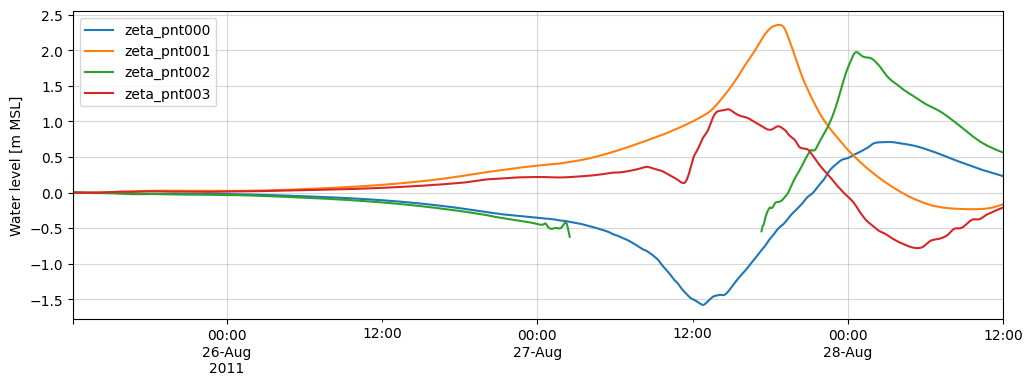

In [31]:
fig, ax = plt.subplots(figsize = (12, 4))
dfout.plot(ax = ax)
ax.grid(alpha = 0.5)
ax.set_ylabel('Water level [m MSL]')